# CLIP-Image-Classification
Removed unnecesarry options and added the image generator to this notebook: 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kingchloexx/CLIP-Image-Classification/blob/main/Multi_Domain_Pretrained_Classifier_with_CLIP.ipynb) (link is dead)

### restart runtime after running this cell


In [ ]:
#@title setup libraries
import torch
import numpy as np
from PIL import Image
import os
import random
from IPython import display
from IPython.core.interactiveshell import InteractiveShell
import subprocess
InteractiveShell.ast_node_interactivity = "all"

CUDA_version = [s for s in subprocess.check_output(["nvcc", "--version"]).decode("UTF-8").split(", ") if s.startswith("release")][0].split(" ")[-1]
print("CUDA version:", CUDA_version)

if CUDA_version == "10.0":
    torch_version_suffix = "+cu100"
elif CUDA_version == "10.1":
    torch_version_suffix = "+cu101"
elif CUDA_version == "10.2":
    torch_version_suffix = ""
else:
    torch_version_suffix = "+cu110"

#As of 3/29/22, kingchloexx appears to have deleted Github, Twitter accounts, and Colab notebooks.
#!git clone https://github.com/kingchloexx/CLIP-Image-Classification

!git clone https://github.com/melnikoleg/CLIP-Image-Classification

! pip install torch==1.7.1{torch_version_suffix} torchvision==0.8.2{torch_version_suffix} -f https://download.pytorch.org/whl/torch_stable.html ftfy regex
# %cd /content/
# !git clone https://github.com/openai/CLIP.git
# %cd /content/CLIP/
!pip install ftfy
# !mv /content/CLIP /content/CLIP-Repo
# !mv /content/CLIP-Repo/clip /content/CLIP-Image-Classification/clip



CUDA version: 11.1
fatal: destination path 'CLIP-Image-Classification' already exists and is not an empty directory.
Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [ ]:
#@title Option 1. Generate typography

from PIL import Image, ImageDraw, ImageFont
import textwrap

class Meme:

    basewidth = 1200                  #Width to make the meme
    fontBase = 100
    letSpacing = 1                    #Space between letters
    fill = (0,0,0)                    #TextColor
    stroke_fill = (255,255,255)       #outlineColor
    lineSpacing = 10                  #Space between lines
    stroke_width=2                    #How thick the outline of the text is
    fontfile = '/content/Bangers-Regular.ttf'

    def __init__(self, caption, image):
        self.img = self.createImage(image)
        self.d = ImageDraw.Draw(self.img)

        self.splitCaption = textwrap.wrap(caption, width=20)  # The text can be wider than the img. If that's the case, split the text into multiple lines.
        self.splitCaption.reverse()                           # Draw the lines of text from the bottom up.

        fontSize = self.fontBase+10 if len(self.splitCaption) <= 1 else self.fontBase   #If there is only one line, make the text a bit larger.
        self.font = ImageFont.truetype(font=self.fontfile, size=fontSize)
        # self.shadowFont = ImageFont.truetype(font='./impact.ttf', size=fontSize+10)

    def draw(self):
        '''
        Draws text onto this objects img object
        :return: A pillow image object with text drawn onto the image
        '''
        (iw, ih) = self.img.size
        (_, th) = self.d.textsize(self.splitCaption[0], font=self.font) #Height of the text.
        y = (ih - (ih / 10)) - (th / 2) #The starting y position to draw the last line of text. Text in drawn from the bottom line up.

        for cap in self.splitCaption:   #For each line of text
            (tw, _) = self.d.textsize(cap, font=self.font)  # Getting the position of the text.
            x = ((iw - tw) - (len(cap) * self.letSpacing))/2  # Center the text and account for the spacing between letters.

            self.drawLine(x=x, y=y, caption=cap)
            y = y - th - self.lineSpacing  # Next block of text is higher up

        wpercent = ((self.basewidth/2) / float(self.img.size[0]))
        hsize = int((float(self.img.size[1]) * float(wpercent)))
        return self.img.resize((int(self.basewidth/2), hsize))

    def createImage(self, image):
        '''
        Resizes the image to a resonable standard size
        :param image: Path to an image file
        :return: A pil image object
        '''
        img = Image.open(image)
        wpercent = (self.basewidth / float(img.size[0]))
        hsize = int((float(img.size[1]) * float(wpercent)))
        return img.resize((self.basewidth, hsize))

    def drawLine(self, x, y, caption):
        '''
        The text gets split into multiple lines if it is wider than the image. This function draws a single line
        :param x: The starting x coordinate of the text
        :param y: The starting y coordinate of the text
        :param caption: The text to write on the image
        :return: None
        '''
        for idx in range(0, len(caption)):  #For each letter in the line of text
            char = caption[idx]
            w, h = self.font.getsize(char)  #width and height of the letter
            self.d.text(
                (x, y),
                char,
                fill=self.fill,
                stroke_width=self.stroke_width,
                font=self.font,
                stroke_fill=self.stroke_fill
            )  # Drawing the text character by character. This way spacing can be added between letters
            x += w + self.letSpacing #The next character must be drawn at an x position more to the right

#Delete previously generated typography.

!rm /content/text.png

#Get the font and make a blank white image.

!wget https://github.com/downysoftware/CLIP-Input-to-Emoji/blob/main/Bangers-Regular.ttf?raw=true -O /content/Bangers-Regular.ttf

img = Image.new('RGB', (200, 200), color = 'white')
img.save('/content/blank.png')

#Add text to the image.

caption = "Breaking Bad, the TV series about a high school teacher cooking meth"#@param {type:"string"}
image = '/content/blank.png'
outputImage = '/content/text.png'

meme = Meme(caption, image)
img = meme.draw()
if img.mode in ("RGBA", "P"):   #Without this the code can break sometimes
    img = img.convert("RGB")
img.save(outputImage, optimize=True, quality=80)    #Save with some image optimization

image_url = "/content/text.png"

--2022-03-29 22:55:18--  https://github.com/otakucore/text2emoji/blob/main/Bangers-Regular.ttf?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/downysoftware/CLIP-Input-to-Emoji/blob/main/Bangers-Regular.ttf?raw=true [following]
--2022-03-29 22:55:18--  https://github.com/downysoftware/CLIP-Input-to-Emoji/blob/main/Bangers-Regular.ttf?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/downysoftware/CLIP-Input-to-Emoji/raw/main/Bangers-Regular.ttf [following]
--2022-03-29 22:55:18--  https://github.com/downysoftware/CLIP-Input-to-Emoji/raw/main/Bangers-Regular.ttf
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/downysoftware/CLIP-Input-to-Emoji/

In [ ]:
#@title Option 2. Upload an image

from google.colab import files
from PIL import Image
import os

#Delete previously used image.
!rm /content/text.png

image_url = files.upload()

dst ='/content/text.png' 
os.rename(list(image_url.keys())[0], dst)

image_url = "/content/text.png"

In [ ]:
#@title Option 3. Enter a remote image URL

image_url = "/content/text.png"#@param {type:"string"}
!wget "$image_url" -O "input.jpg" -q

### classify

/content/CLIP-Image-Classification


100%|███████████████████████████████████████| 354M/354M [00:05<00:00, 62.2MiB/s]


loading categories
classifying
⚗️



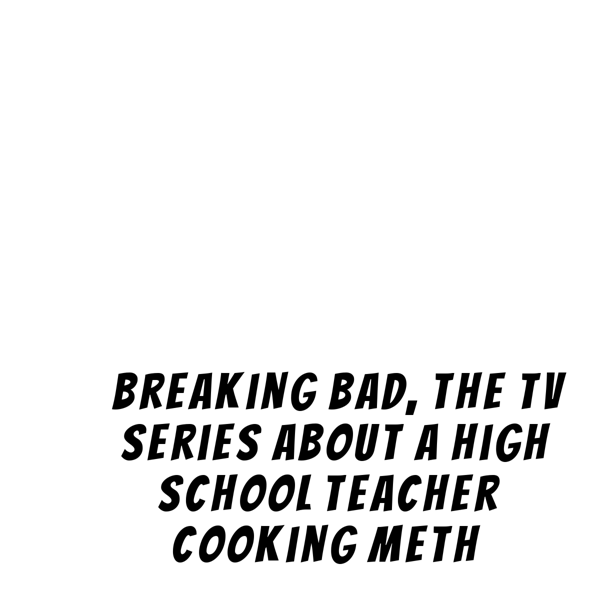

In [ ]:
#@title Run this to get your result!

from PIL import Image
%cd /content/CLIP-Image-Classification

filename = image_url
#This notebook originally had more categories, but the others aren't really useful.
load_categories = "emojis"
#load_categories = "words in the communist manifesto" #@param ["imagenet", "emojis", "dog vs cat", "pokemon", "words in the communist manifesto", "other (open this cell and write them into a list of strings)"]

from classify import load, classify
print("loading categories")
load(load_categories)
print("classifying")

print(classify(filename))
Image.open(filename)